# Topic:- Waste Classification

## Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd #for manipulation and analysis
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
# TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# For Grad-CAM
import tensorflow.keras.backend as K

# Print versions (helps reproducibility)
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.20.0


### Set the Path in Python

In [2]:
dataset_dir = r"C:\Users\js640\Downloads\archive (2)\DATASET"


### Load Training & Validation Data Using tf.data

In [3]:

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir + "/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir + "/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)


Found 22564 files belonging to 2 classes.
Found 2513 files belonging to 2 classes.


### Print Class Names

In [4]:
print(train_ds.class_names)


['O', 'R']


### View Sample Images

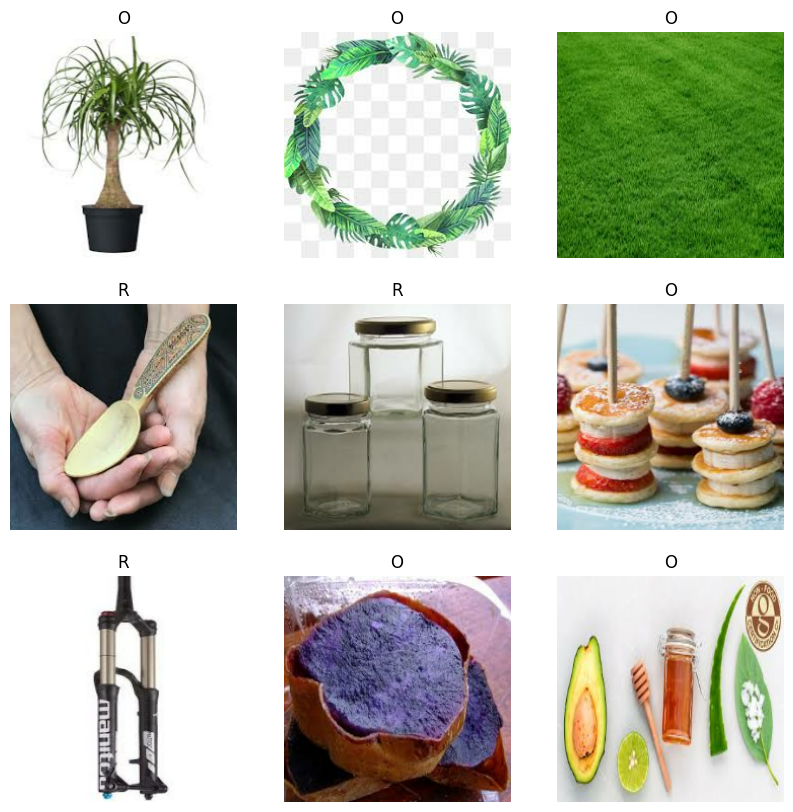

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")


In [6]:
#  Save class names
class_names = train_ds.class_names
print("Classes:", class_names)

Classes: ['O', 'R']


### Build a CNN Model

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),  # Normalize

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(train_ds.class_names), activation='softmax')
])


C:\Users\js640\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


### Train the model

In [10]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=6
)


Epoch 1/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 578s 811ms/step - accuracy: 0.8120 - loss: 0.4351 - val_accuracy: 0.8778 - val_loss: 0.3389
Epoch 2/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 515s 730ms/step - accuracy: 0.8448 - loss: 0.3630 - val_accuracy: 0.8687 - val_loss: 0.3241
Epoch 3/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 516s 731ms/step - accuracy: 0.8662 - loss: 0.3194 - val_accuracy: 0.8679 - val_loss: 0.3299
Epoch 4/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 527s 747ms/step - accuracy: 0.8893 - loss: 0.2725 - val_accuracy: 0.8762 - val_loss: 0.3422
Epoch 5/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 545s 772ms/step - accuracy: 0.9150 - loss: 0.2149 - val_accuracy: 0.8341 - val_loss: 0.5005
Epoch 6/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 545s 772ms/step - accuracy: 0.9414 - loss: 0.1527 - val_accuracy: 0.8786 - val_loss: 0.4474


In [11]:
loss, accuracy = model.evaluate(test_ds)
print("Validation accuracy:", accuracy)
print("Loss:", loss)


79/79 ━━━━━━━━━━━━━━━━━━━━ 15s 190ms/step - accuracy: 0.8786 - loss: 0.4474
Validation accuracy: 0.8786311149597168
Loss: 0.44744113087654114


### Training Accuracy/Loss Plots

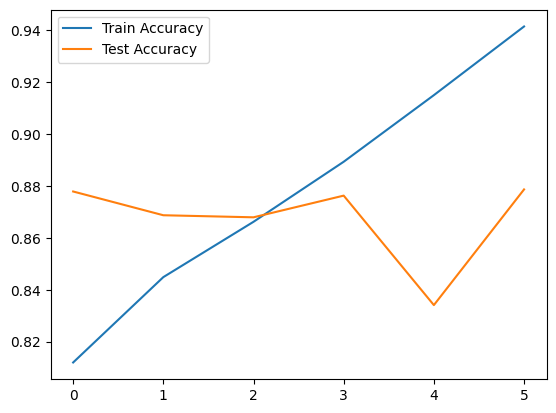

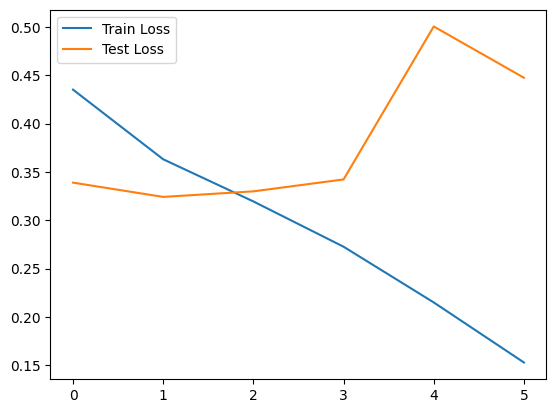

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()


In [26]:
img_path = r"C:\Users\js640\Downloads\archive (2)\DATASET\TEST\R\R_11023.jpg"
#print(os.listdir(img_path))
img = tf.keras.utils.load_img(img_path, target_size=IMG_SIZE)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

pred = model.predict(img_array)
class_id = np.argmax(pred)
class_name = train_ds.class_names[class_id]

print("Predicted class:", class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
Predicted class: R


In [25]:
img_path = r"C:\Users\js640\Downloads\archive (2)\DATASET\TEST\O\\O_13859.jpg"
#print(os.listdir(img_path))
img = tf.keras.utils.load_img(img_path, target_size=IMG_SIZE)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

pred = model.predict(img_array)
class_id = np.argmax(pred)
class_name = train_ds.class_names[class_id]

print("Predicted class:", class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted class: O


In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [16]:
# Collect all images and labels from val_ds
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [17]:
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           O       0.85      0.95      0.90      1401
           R       0.92      0.79      0.85      1112

    accuracy                           0.88      2513
   macro avg       0.89      0.87      0.87      2513
weighted avg       0.88      0.88      0.88      2513



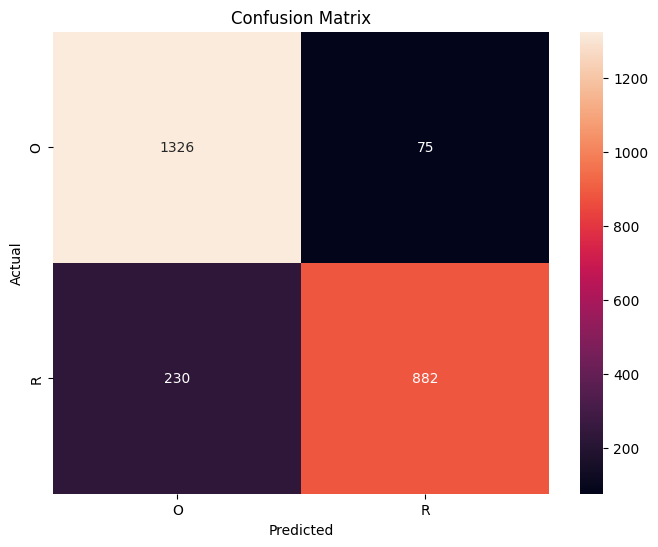

In [18]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


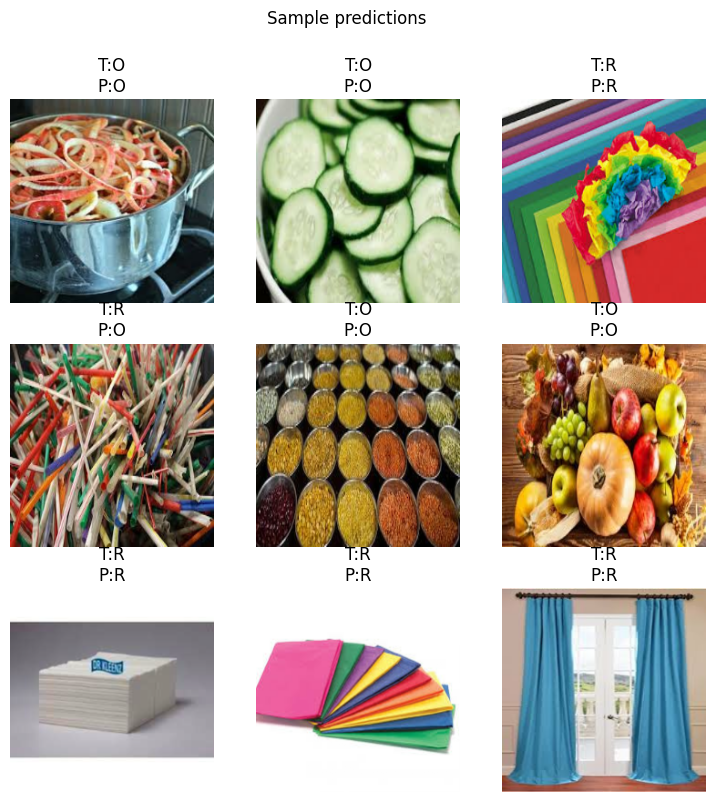

In [19]:
# Create output folder 
OUTPUT_DIR = "outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

def show_predictions(n=9):
    plt.figure(figsize=(9,9))
    i = 0
    for images, labels in test_ds.take(5):
        preds = model.predict(images)
        for j in range(images.shape[0]):
            if i >= n: break
            ax = plt.subplot(3,3,i+1)
            img = images[j].numpy()
            img = (img - img.min())/(img.max()-img.min())
            plt.imshow(img)
            true = class_names[int(labels[j])]
            pred = class_names[int(np.argmax(preds[j]))]
            plt.title(f"T:{true}\nP:{pred}")
            plt.axis('off')
            i += 1
        if i >= n: break
    plt.suptitle("Sample predictions")
    plt.savefig(os.path.join(OUTPUT_DIR, "pred_examples.png"))
    plt.show()

show_predictions()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


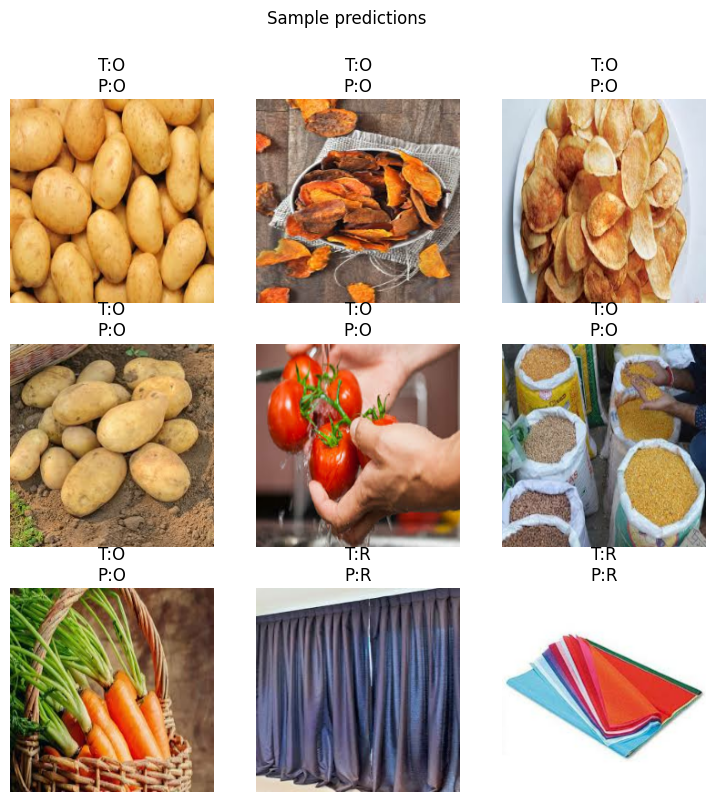

In [20]:
# Create output folder 
OUTPUT_DIR = "outputs"
os.makedirs(OUTPUT_DIR, exist_ok=True)

def show_predictions(n=9):
    plt.figure(figsize=(9,9))
    i = 0
    for images, labels in test_ds.take(1):
        preds = model.predict(images)
        for j in range(images.shape[0]):
            if i >= n: break
            ax = plt.subplot(3,3,i+1)

            img = images[j].numpy()
            img = (img - img.min())/(img.max() - img.min())
            plt.imshow(img)

            true = class_names[int(labels[j])]
            pred = class_names[int(np.argmax(preds[j]))]

            plt.title(f"T:{true}\nP:{pred}")
            plt.axis('off')
            i += 1

    plt.suptitle("Sample predictions")

    # save image
    plt.savefig(os.path.join(OUTPUT_DIR, "pred_examples.png"))
    plt.show()

show_predictions()


### Save the model

In [27]:
model.save("waste_classifier.keras")
print("Model saved successfully!")

Model saved successfully!
